In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib



In [5]:
data=pd.read_csv('/content/first inten project.csv')


In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0.0,0.0,0.0,88.00,0.0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0.0,0.0,0.0,106.68,1.0,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0.0,0.0,0.0,50.00,0.0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0.0,0.0,0.0,100.00,1.0,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0.0,0.0,0.0,77.00,0.0,4/11/2018,Canceled


In [6]:
data.tail()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
23470,INN23471,2,0,2,2,Meal Plan 1,0,Room_Type 4,32,Online,0.0,0.0,0.0,134.78,1.0,9/25/2018,Not_Canceled
23471,INN23472,1,0,1,4,Meal Plan 1,0,Room_Type 1,23,Online,0.0,0.0,0.0,92.00,1.0,8/31/2017,Not_Canceled
23472,INN23473,2,0,2,1,Meal Plan 2,0,Room_Type 1,145,Offline,0.0,0.0,0.0,94.50,0.0,8/29/2017,Canceled
23473,INN23474,3,0,1,3,Meal Plan 1,0,Room_Type 4,57,Online,0.0,0.0,0.0,158.40,1.0,10/17/2018,Canceled
23474,INN23475,2,0,2,5,Not Selected,0,Room_Type 1,157,Onli,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(23475, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                23475 non-null  object 
 1   number of adults          23475 non-null  int64  
 2   number of children        23475 non-null  int64  
 3   number of weekend nights  23475 non-null  int64  
 4   number of week nights     23475 non-null  int64  
 5   type of meal              23475 non-null  object 
 6   car parking space         23475 non-null  int64  
 7   room type                 23475 non-null  object 
 8   lead time                 23475 non-null  int64  
 9   market segment type       23475 non-null  object 
 10  repeated                  23474 non-null  float64
 11  P-C                       23474 non-null  float64
 12  P-not-C                   23474 non-null  float64
 13  average price             23474 non-null  float64
 14  specia

In [9]:
data.duplicated().sum()

0

In [10]:
sum(data.duplicated())==0

True

In [11]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    1
P-C                         1
P-not-C                     1
average price               1
special requests            1
date of reservation         1
booking status              1
dtype: int64

In [12]:
data['booking status']=data['booking status'].replace({'Not_Canceled':0,'Canceled':1  })

In [13]:
data['booking status']

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
23470    0.0
23471    0.0
23472    1.0
23473    1.0
23474    NaN
Name: booking status, Length: 23475, dtype: float64

<Axes: xlabel='booking status'>

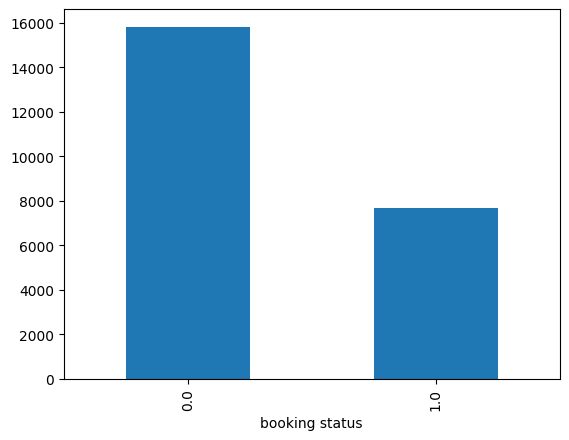

In [14]:
data['booking status'].value_counts().plot(kind='bar')

In [15]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [16]:
data=data.drop(['market segment type'],axis=1)
data=data.drop(['special requests'],axis=1)
data=data.drop(['repeated'],axis=1)
data=data.drop(['lead time'],axis=1)
data=data.drop(['average price '],axis=1)

In [17]:
data.shape

(23475, 12)

<ipython-input-18-bbc7e186ea3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['booking status'],palette='rainbow',orient='h')


<Axes: xlabel='booking status'>

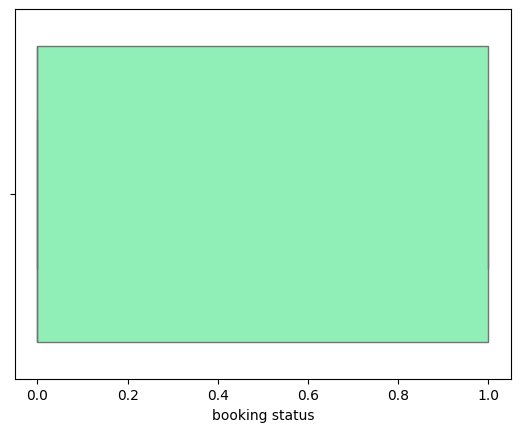

In [18]:
sns.boxplot(data['booking status'],palette='rainbow',orient='h')

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


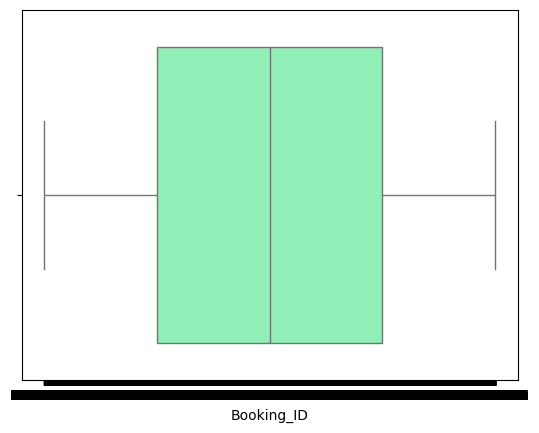

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


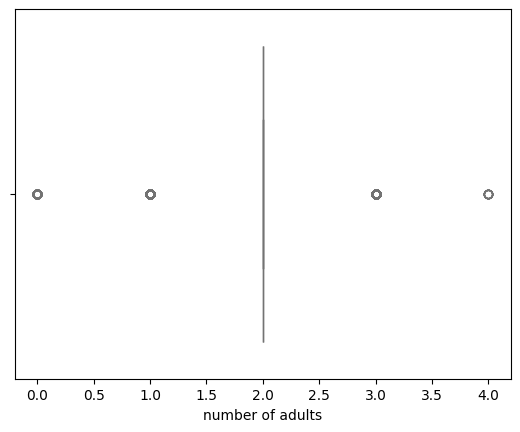

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


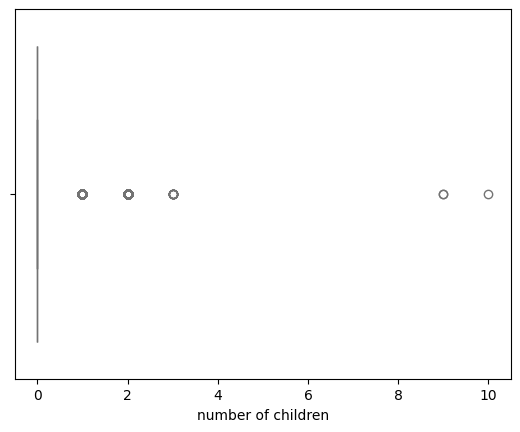

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


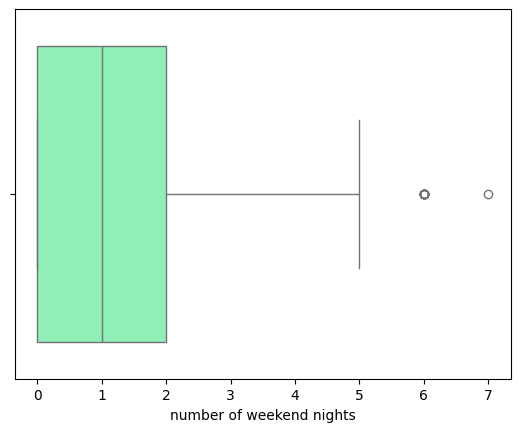

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


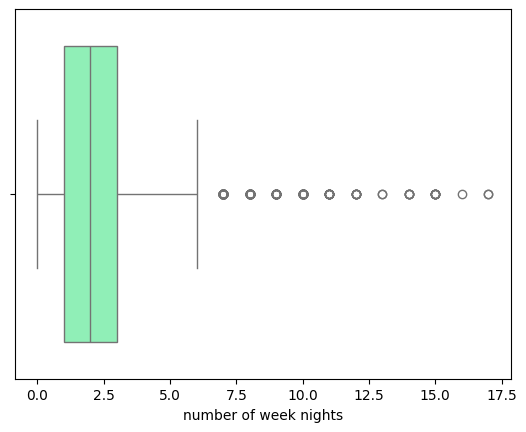

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


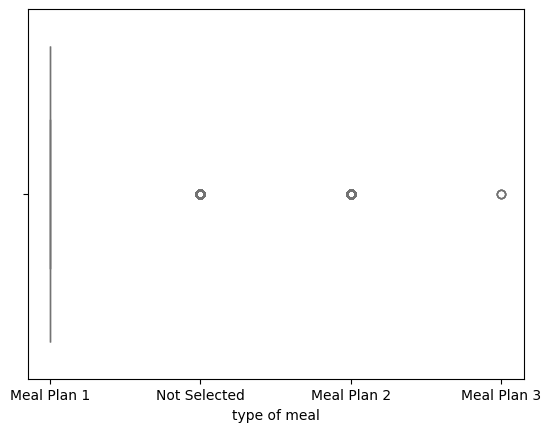

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


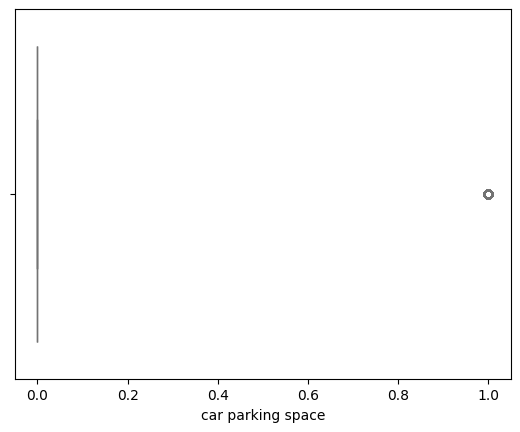

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


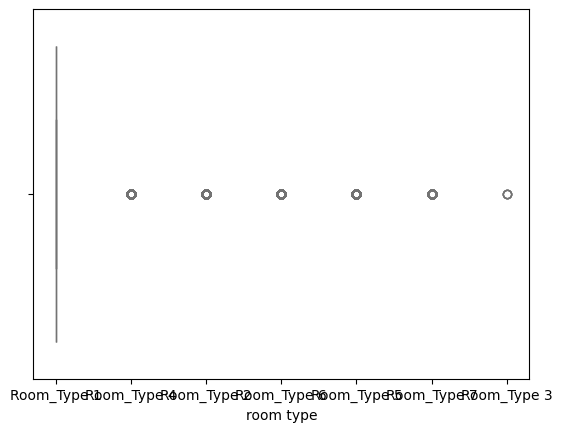

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


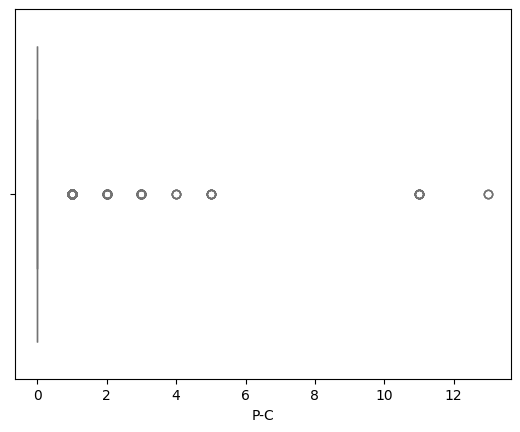

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


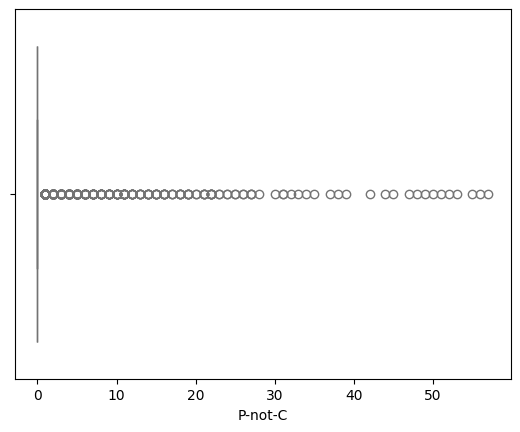

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


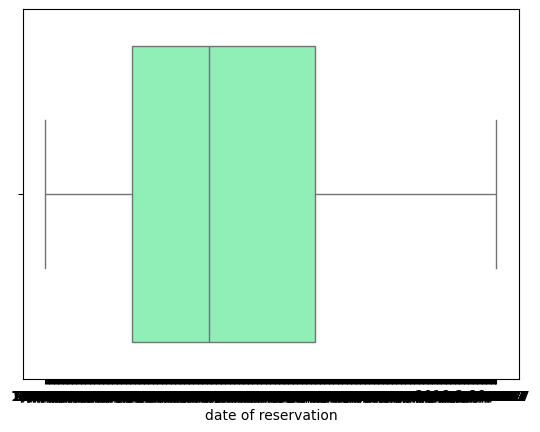

<ipython-input-19-442d5f2894f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


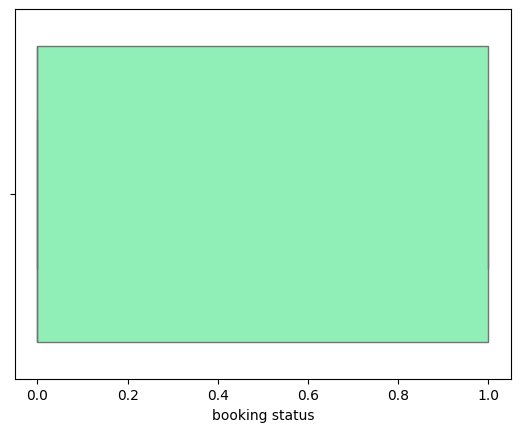

In [19]:
for col in data.columns:
    sns.boxplot(data[col], palette='rainbow', orient='h')
    plt.show()

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


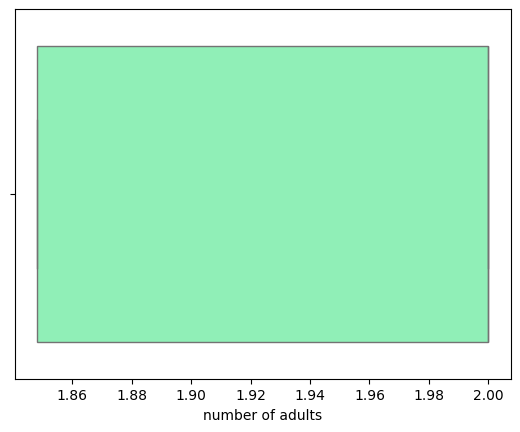

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


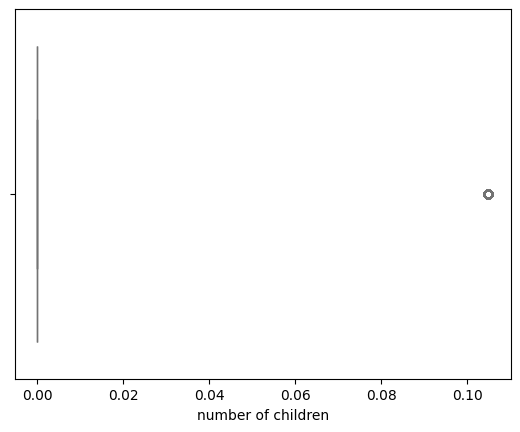

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


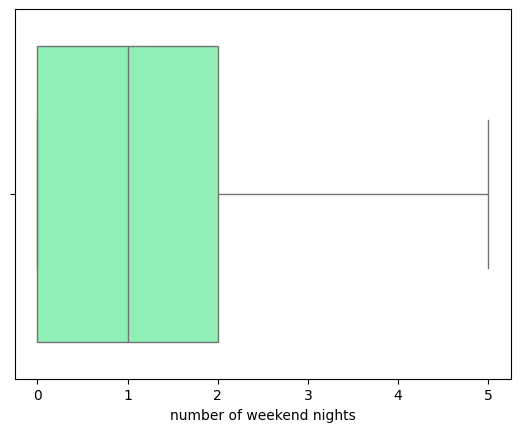

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


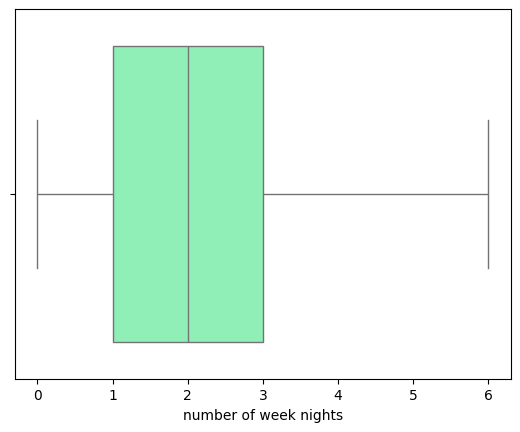

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


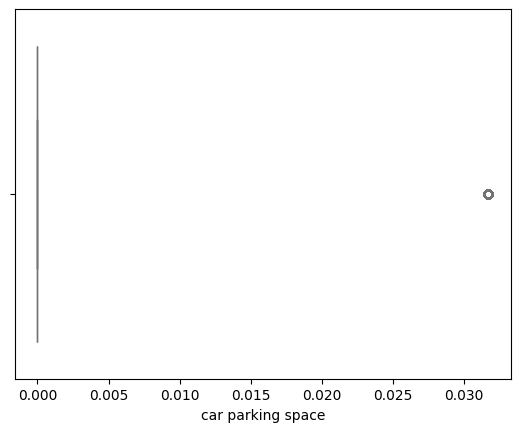

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


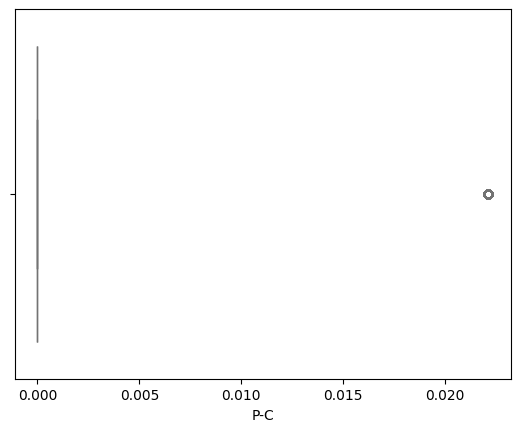

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


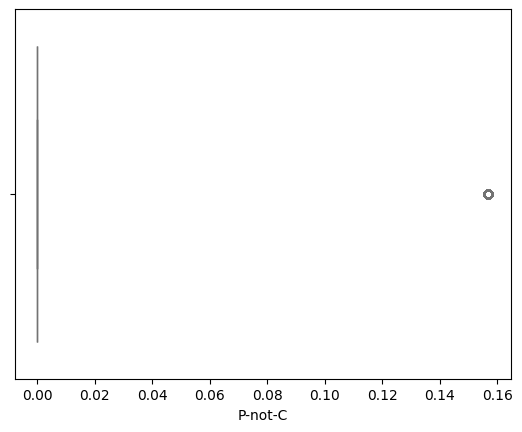

<ipython-input-20-a913fbe23c65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


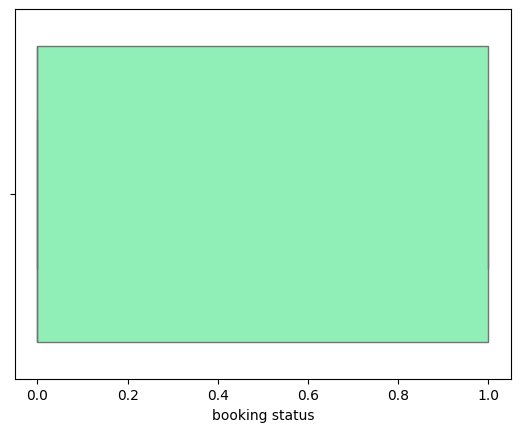

In [20]:

# Replace outliers with the mean for numeric columns only
for col in data.select_dtypes(include=np.number).columns: # Select only numeric columns
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower_bound = data[col].quantile(0.25) - 1.5 * IQR
    upper_bound = data[col].quantile(0.75) + 1.5 * IQR
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound),
                         data[col].mean(), data[col])

# Check for outliers again in numeric columns
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(data[col], palette='rainbow', orient='h')
    plt.show()

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


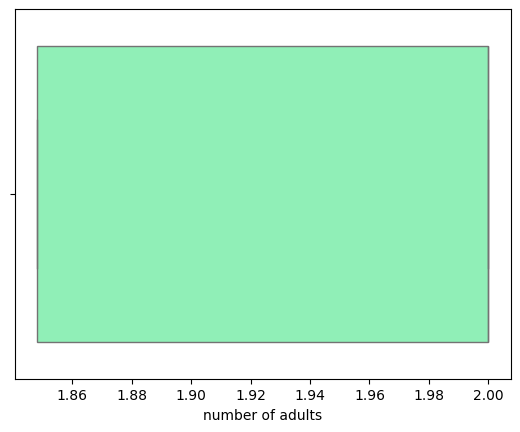

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


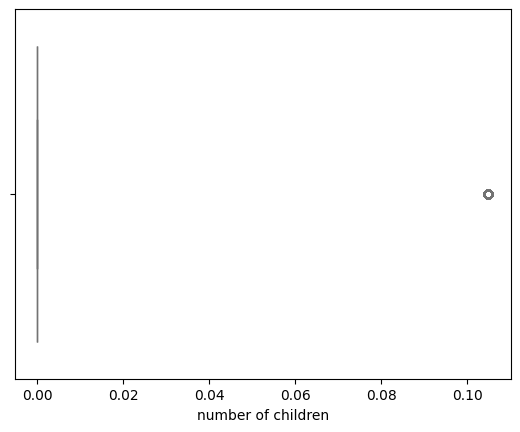

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


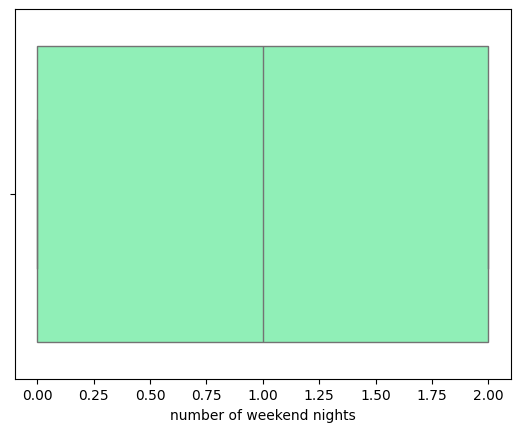

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


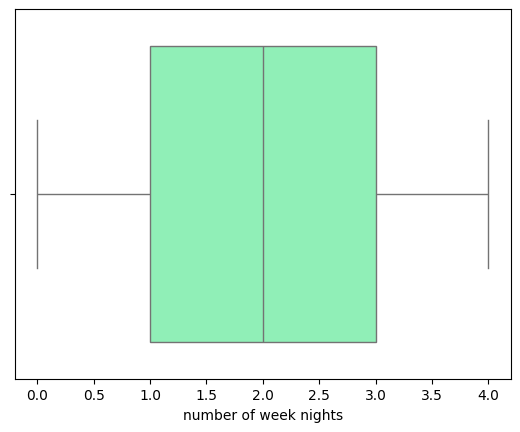

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


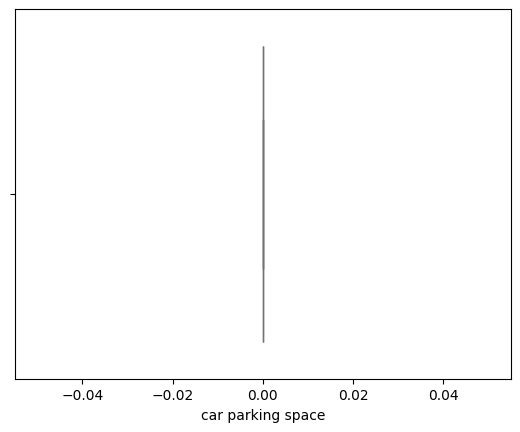

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


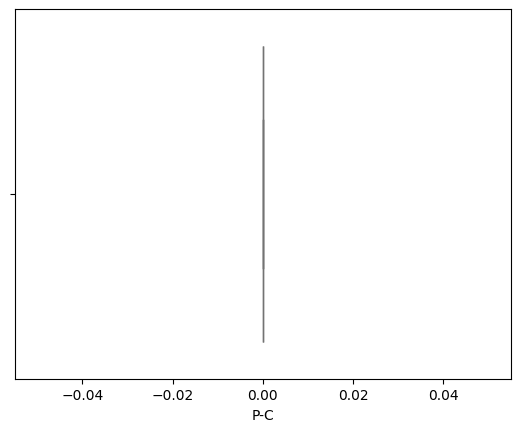

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


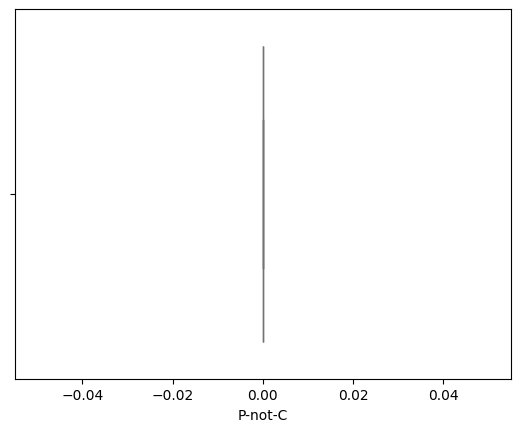

<ipython-input-21-50d8391b36ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[col], palette='rainbow', orient='h')


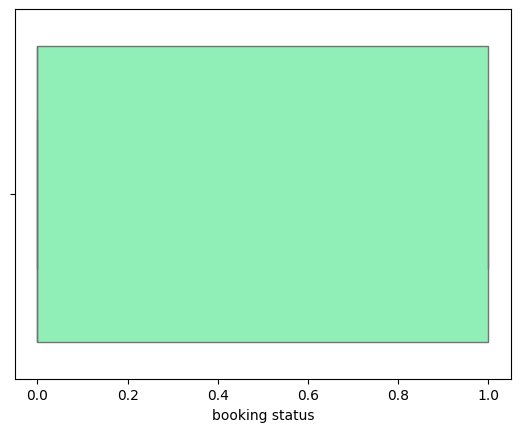

In [21]:
# Winsorize numeric columns to handle outliers
for col in data.select_dtypes(include=np.number).columns:
    data[col] = winsorize(data[col], limits=[0.05, 0.05])  # Cap the top and bottom 5% of values

# Check for outliers again in numeric columns
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(data[col], palette='rainbow', orient='h')
    plt.show()

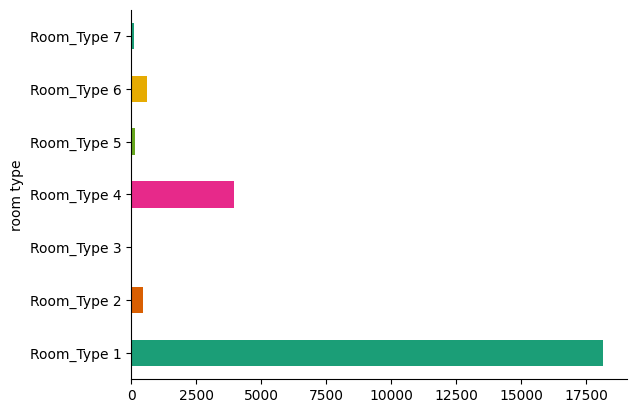

In [22]:
data.groupby('room type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

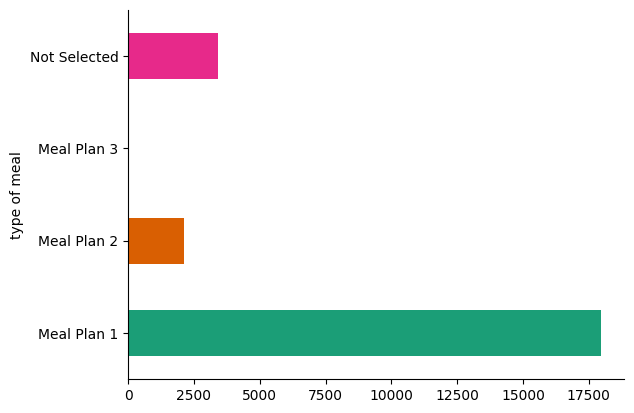

In [23]:
data.groupby('type of meal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

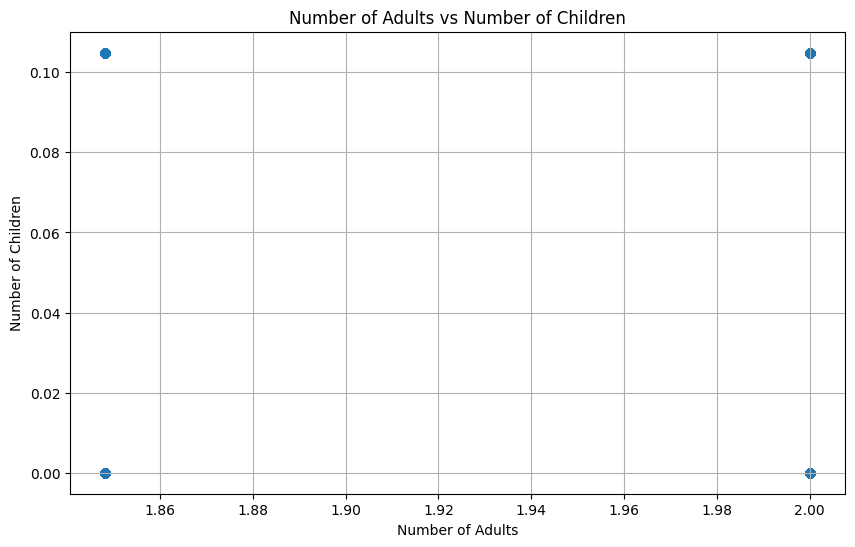

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data['number of adults'], data['number of children'], alpha=0.5)
plt.title('Number of Adults vs Number of Children')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Children')
plt.grid(True)
plt.show()

In [25]:

# Extract numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Extract categorical features
categorical_features = data.select_dtypes(exclude=['int64', 'float64'])

# Print the number of numerical and categorical features
print(f"Number of numerical features: {len(numerical_features.columns)}")
print(f"Number of categorical features: {len(categorical_features.columns)}")



Number of numerical features: 8
Number of categorical features: 4


In [26]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numeric columns
for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())


   Booking_ID  number of adults  number of children  number of weekend nights  \
0           0          1.848222            0.104878                       2.0   
1           1          1.848222            0.000000                       1.0   
2           2          2.000000            0.104878                       1.0   
3           3          1.848222            0.000000                       0.0   
4           4          1.848222            0.000000                       1.0   

   number of week nights  type of meal  car parking space  room type  P-C  \
0                    4.0             0                0.0          0  0.0   
1                    3.0             3                0.0          0  0.0   
2                    3.0             0                0.0          0  0.0   
3                    2.0             0                0.0          0  0.0   
4                    2.0             3                0.0          0  0.0   

   P-not-C  date of reservation  booking status  


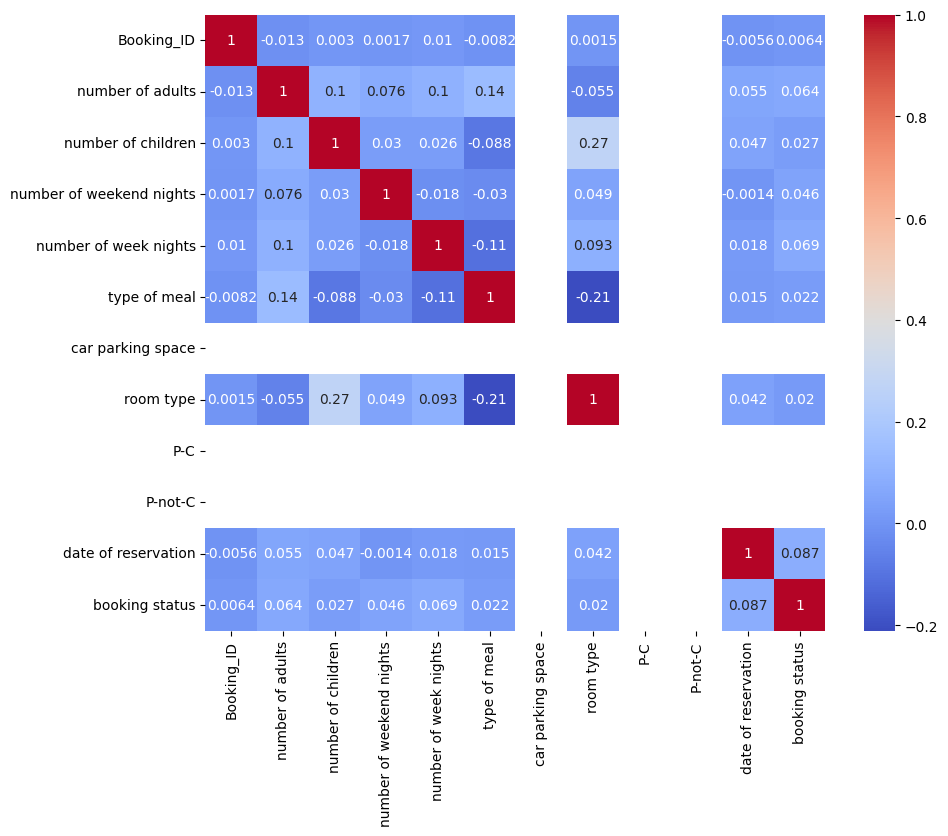

In [27]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Identify highly correlated features (correlation coefficient > 0.8)
high_corr_features = [feature for feature in corr_matrix.columns if any(corr_matrix[feature] > 0.8)]

In [28]:
X = data.drop('booking status', axis=1)
y = data['booking status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

print("Training Set:")
print(X_train)
print(y_train)

print("\nTesting Set:")
print(X_test)
print(y_test)

Training Set:
       Booking_ID  number of adults  number of children  \
7806         7806          2.000000                 0.0   
21964       21964          1.848222                 0.0   
6028         6028          2.000000                 0.0   
18526       18526          2.000000                 0.0   
6157         6157          2.000000                 0.0   
...           ...               ...                 ...   
20971       20971          2.000000                 0.0   
23030       23030          1.848222                 0.0   
21862       21862          1.848222                 0.0   
22660       22660          2.000000                 0.0   
11125       11125          2.000000                 0.0   

       number of weekend nights  number of week nights  type of meal  \
7806                        2.0                    0.0             0   
21964                       1.0                    2.0             0   
6028                        1.0                    2.0       

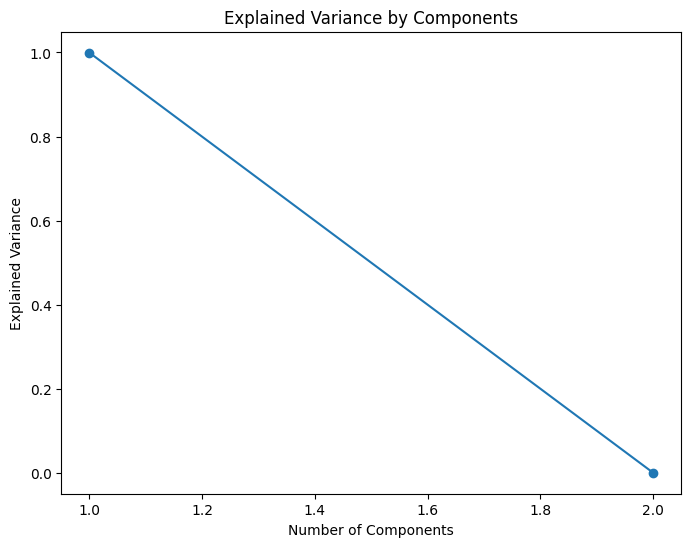

In [29]:
pca = PCA(n_components=2)  # Change n_components based on your needs

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [30]:

#  KNN classifier
knn = KNeighborsClassifier(n_neighbors=40)

# Train the KNN model
knn.fit(X_train, y_train)

# Evaluate the KNN model on the test set
accuracy = knn.score(X_test, y_test)

print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.6615548455804047


In [32]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Evaluate the Decision Tree model on the test set
accuracy = dt_classifier.score(X_test, y_test)

print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.6653887113951011


In [50]:
# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.6719914802981896

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      3155
         1.0       0.00      0.00      0.00      1540

    accuracy                           0.67      4695
   macro avg       0.34      0.50      0.40      4695
weighted avg       0.45      0.67      0.54      4695


Confusion Matrix:
 [[3155    0]
 [1540    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

best_dt_model = grid_search_dt.best_estimator_

accuracy_dt = best_dt_model.score(X_test, y_test)
print("Accuracy of best Decision Tree model:", accuracy_dt)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree: 0.7086261980830671
Accuracy of best Decision Tree model: 0.7052183173588924


In [36]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

best_knn_model = grid_search_knn.best_estimator_

accuracy_knn = best_knn_model.score(X_test, y_test)
print("Accuracy of best KNN model:", accuracy_knn)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best score for KNN: 0.6536208732694357
Accuracy of best KNN model: 0.6468583599574015


Best alpha: 0.00019179102616724886
Mean CV Score: -0.21566585032847044
Mean Squared Error: 0.2179641860372566


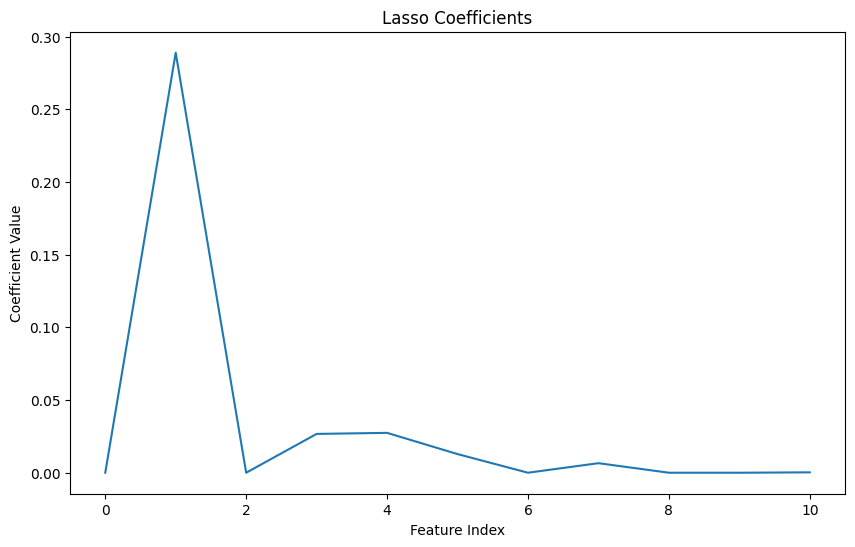

In [41]:

# Further tuning with cross-validation
alphas = np.logspace(-4, -2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Cross-validated score
cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print(f"Mean CV Score: {mean_cv_score}")

# Evaluate on test set
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.coef_)
plt.title("Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


In [40]:


# Ridge Regression
ridge = Ridge(alpha=best_alpha)  # Use the same alpha for comparison
ridge.fit(X_train, y_train)

# Cross-validated score
ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
ridge_mean_cv_score = np.mean(ridge_cv_scores)
print(f"Ridge Mean CV Score: {ridge_mean_cv_score}")

# Evaluate on test set
ridge_y_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Mean Squared Error: {ridge_mse}")

Ridge Mean CV Score: -0.21563654104619254
Ridge Mean Squared Error: 0.21788809904535178


In [43]:
# Serialize the model
joblib.dump(best_alpha, 'lasso_model.pkl')

['lasso_model.pkl']